In [8]:
#Task 1 - Data loading and splitting
# import packages

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# code starts here
df = pd.read_csv(r'C:\Users\tdhoble\Downloads\Music_Genre_classification.csv')
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)
# code ends here

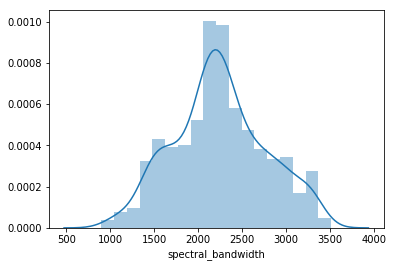

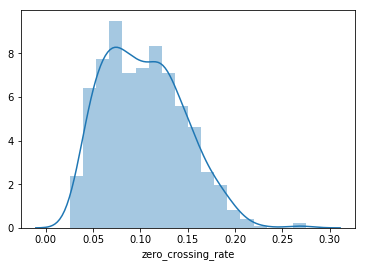

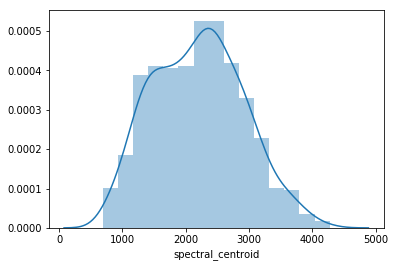

In [9]:
#Task 2 - Explore the features
# code starts here
bandwidth = X_train['spectral_bandwidth']
sns.distplot(bandwidth)
plt.show()

zc_rate = X_train['zero_crossing_rate']
sns.distplot(zc_rate)
plt.show()

centroid = X_train['spectral_centroid']
sns.distplot(centroid)
plt.show()
# code ends here

In [10]:
#Task 3 - Data preprocessing and predictor check
# import the packages
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# code starts here

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("accuracy_lr: {}".format(accuracy_lr))
# code ends here


accuracy_lr: 0.81


In [11]:
#Task 4 - Predictor check using other classifier
#import the packages 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# code starts here
sc = SVC(random_state=9)
sc.fit(X_train, y_train)
y_pred_sc = sc.predict(X_test)
accuracy_sc =  accuracy_score(y_test, y_pred_sc)
print("accuracy_sc: ",accuracy_sc)

rf = RandomForestClassifier(random_state=9)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("accuracy_rf: ",accuracy_rf)
# code ends here

accuracy_sc:  0.8366666666666667
accuracy_rf:  0.87


In [12]:
#Task 5 - Predictor check using BaggingClassifier
# import packages
from sklearn.ensemble import BaggingClassifier


# code starts here
bagging_clf = BaggingClassifier(base_estimator=lr, n_estimators=50, max_samples=100, bootstrap=True, random_state=9)
bagging_clf.fit(X_train, y_train)
y_pred_bag = bagging_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_bag)
print("accuracy: ",accuracy)
# code ends here


accuracy:  0.7733333333333333
